Problem statement:

-To determine whether a person makes over $50K a year

In [22]:
#loading the dataset

import pandas as pd
import numpy as np

df=pd.read_csv("censusincome.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Preprocessing:

In [2]:
df.sample(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
6251,26,Private,133373,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,42,United-States,<=50K
4768,26,State-gov,109193,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
3494,21,Private,182606,Some-college,10,Never-married,Other-service,Own-child,Black,Male,0,0,40,?,<=50K
7983,40,Private,209547,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,1977,60,United-States,>50K
1739,30,Private,117963,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3902,23,Private,495888,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador,<=50K
6700,56,Private,413373,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,36,United-States,<=50K
4268,22,Private,275385,Some-college,10,Never-married,Other-service,Other-relative,White,Male,0,0,25,United-States,<=50K
2877,31,Private,407930,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
8142,19,Private,389755,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,16,United-States,<=50K


- Education variable has already been encoded as Education_num
- Capital_gain and captial_loss is 0 for most 
- Native-country has '?' as a value

In [3]:
#checking for datatype

df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [23]:
#checking for null values

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- the dataset has no null values
- but let's check out for ' ?' values

In [24]:
#checking for ' ?' values

(df==' ?').sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

- okay so these are kind of null values only
- Since the variables that contain these is of object type so first we will replace these values by NaN and then by their mode

In [25]:
#replacing ' ?' values with NaN

df['Workclass'].replace(' ?',np.nan,inplace=True)
df['Occupation'].replace(' ?',np.nan,inplace=True)
df['Native_country'].replace(' ?',np.nan,inplace=True)

In [26]:
#checking for null values

df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

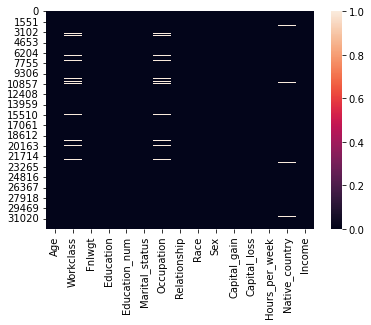

In [28]:
sns.heatmap(df.isnull())

In [29]:
impute=['Workclass','Occupation','Native_country']    #creating list for variables with null values

from sklearn.impute import SimpleImputer

for i in impute:
    df[i]=SimpleImputer(strategy='most_frequent').fit_transform(df[i].values.reshape(-1,1))

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

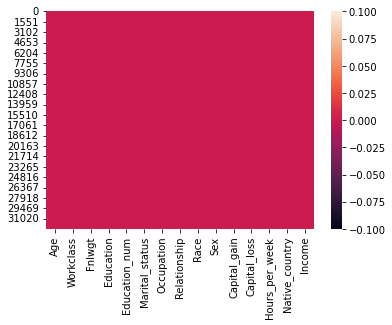

In [30]:
sns.heatmap(df.isnull())

In [31]:
#checking for unique value counts

for i in df.columns:
    print(df[i].value_counts(),'\n','\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64 
 

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 
 

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64 
 

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64 
 

9     105

- capital loss and captial gain have more than 90% values as 0 , so we will remove these two later from the features list
- around 92% of the Native_country values is United-States , so we will see if it has a good correlation with the target variable
- dataset isn't balanced
- First we will perform EDA, after that we will encode the object dtype variables to int

# EDA:

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


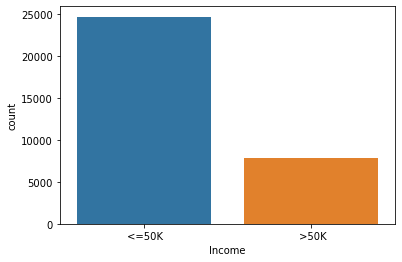

In [34]:
sns.countplot(df['Income'])
plt.show()

- The data is highly imbalanced

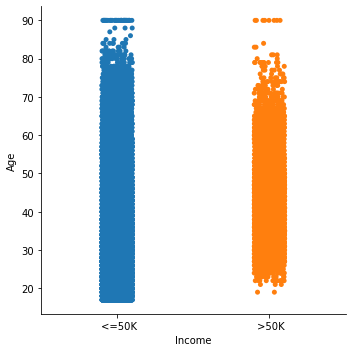

In [35]:
sns.catplot('Income','Age',data=df)
plt.show()

- people aged below 22-23 and above 72-73 have less chances of earning more than 50K a year

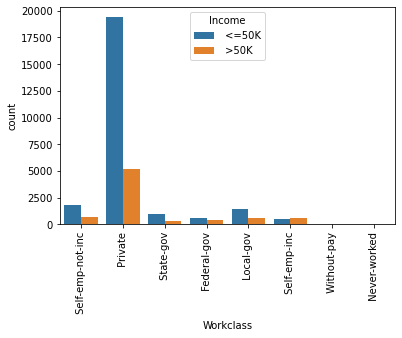

In [36]:
sns.countplot(df['Workclass'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

- Private workclass has the highest count
- Self-emp-inc have very high chances of earning more than 50K a year

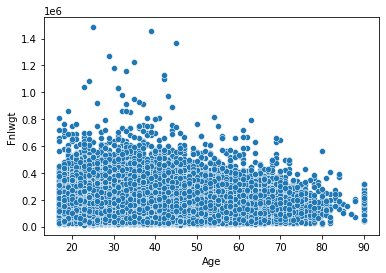

In [39]:
sns.scatterplot('Age','Fnlwgt',data=df)
plt.show()

- age group 22-45 have the highest fnlwgt count in the dataset, so it basically means that there are more people of this age group in USA

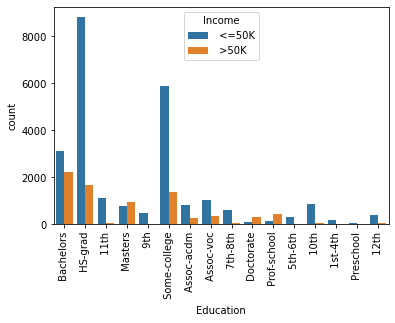

In [40]:
sns.countplot(df['Education'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

- Bachelors have higher rate of earning more than 50K per year
- HS-grad and Some-college have very low chances of earning more than 50K a year
- 10th , Preschool , 5th-6th , 12th , 1st-4th have almost no chances of earning more than 50K

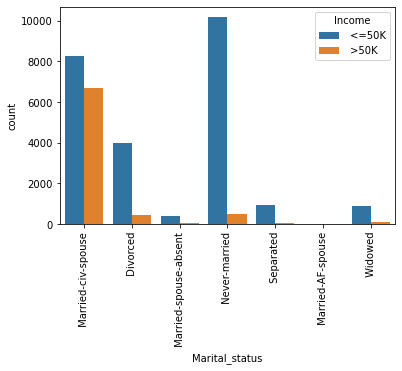

In [41]:
sns.countplot(df['Marital_status'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

- Married-civ-spouse has a very good rate of earning more than 50K a year , Married-spouse-absent , Separated , Married-AF-spouse have very low chances of earning more than 50K

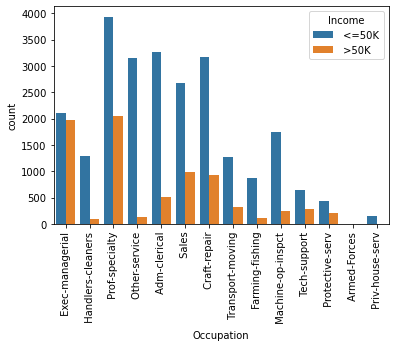

In [42]:
sns.countplot(df['Occupation'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

- Exec-managerial have a very fine rate of earning more than 50K a year
- other-services have very low chances of earning more than 50K a year

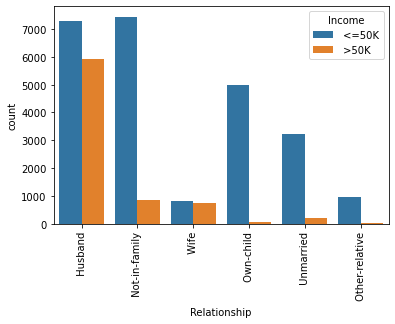

In [43]:
sns.countplot(df['Relationship'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

- Husband and Wife relationship have more counts for more than 50K per year than other relationship

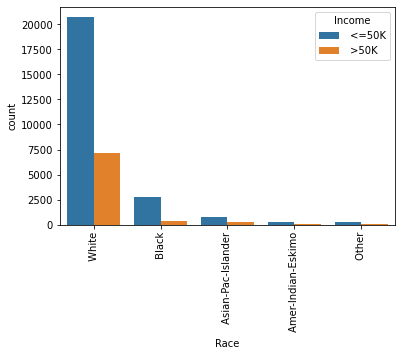

In [44]:
sns.countplot(df['Race'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

- all the other races than White have very low counts for earning more than 50K a year

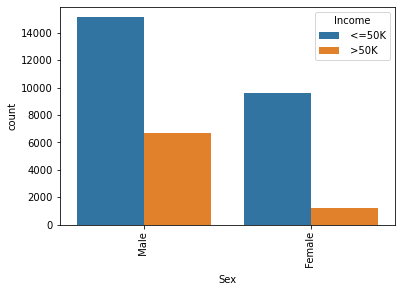

In [45]:
sns.countplot(df['Sex'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

- Females have low count for earning more than 50K a year

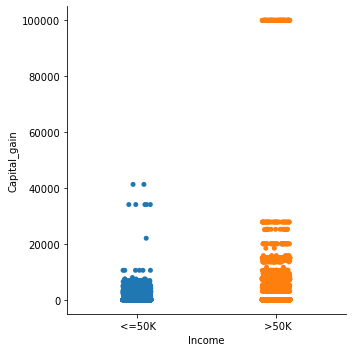

In [48]:
sns.catplot('Income','Capital_gain',data=df)
plt.show()

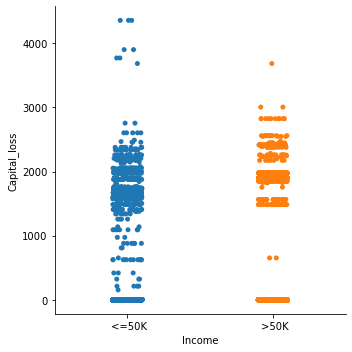

In [49]:
sns.catplot('Income','Capital_loss',data=df)
plt.show()

- Captial_gain and Capital_loss have most values at zero only
- Higher the capital_gain higher the chances of earning more than 50K a year
- Lower the capital_loss , more chances of earning more than 50K a year

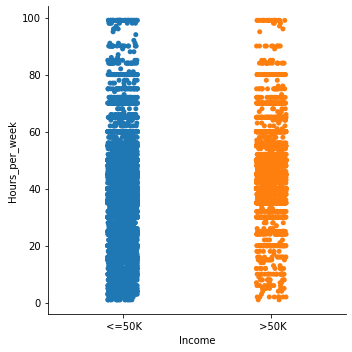

In [50]:
sns.catplot('Income','Hours_per_week',data=df)
plt.show()

- Higher the hours per week more chances of earning more than 50K a year

In [51]:
#now lets LabelEncode the object datatype variables

cat=[]  #creating an empty list for categorical variables
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        pass
    

# now removing Education, as it has already been encoded

cat.remove('Education')

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in cat:
    df[i]=le.fit_transform(df[i])
    
df.sample()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
11919,44,6,136546,Doctorate,16,2,9,0,4,1,0,1902,40,38,1


In [53]:
#now checking for dtypes

df.dtypes

Age                int64
Workclass          int32
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status     int32
Occupation         int32
Relationship       int32
Race               int32
Sex                int32
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country     int32
Income             int32
dtype: object

In [54]:
#dropping Education

df.drop('Education',axis=1,inplace=True)

In [55]:
#checking for correlation

df.corr()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,-0.009481
Education_num,0.036527,0.003445,-0.043159,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995
Capital_gain,0.077674,0.031496,0.000437,0.122627,-0.043398,0.018028,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,0.008818,0.223333


In [56]:
df.corr()['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Race              0.071853
Occupation        0.034599
Native_country    0.023063
Workclass         0.002739
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

- Education_num has the highest correlation with the target variable
- Age , Hours_per_week , Capital_gain , Sex , capital_loss have fine correlation bond with the target variable
- Race , Occupation , Native_Country , Wrokclass have weak correlation bond
- Marital_status , Relationship have negative correlation bond

<Figure size 432x288 with 0 Axes>

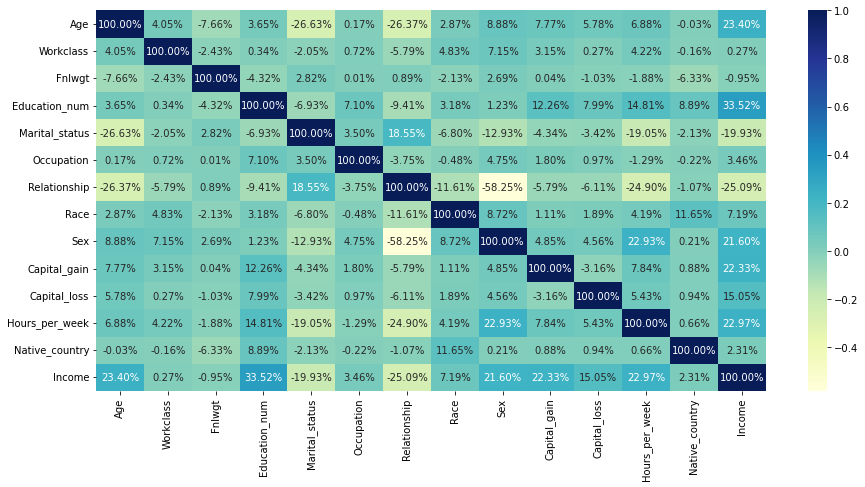

<Figure size 432x288 with 0 Axes>

In [58]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2%')
plt.figure()

In [59]:
# now let's, describe our dataset:

df.describe()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,1.107094,1.055498e+05,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


- skewness is present as some varaibles's mean is higher or lower than their median value
- Outliers might also be there

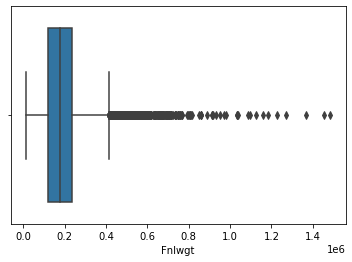

In [60]:
#let's check for outliers

sns.boxplot(df['Fnlwgt'])
plt.show()

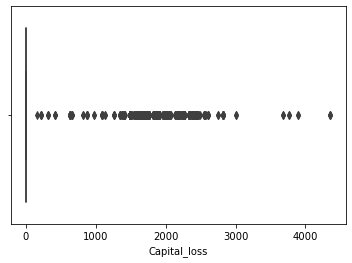

In [62]:
sns.boxplot(df['Capital_loss'])
plt.show()

- so outliers are present

# Data Cleaning:

In [154]:
#lets check out for outliers using zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

#threhold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([12, 11,  7, ...,  7,  7,  7], dtype=int64))

In [155]:
#so outliers are present, so we are going to see how much data is being lost

df_new=df[(z<3).all(axis=1)]

In [156]:
df.shape

(32560, 14)

In [157]:
df_new.shape

(27770, 14)

In [158]:
print('Data loss is:',(32560-27770)/32560*100,'%')

Data loss is: 14.71130221130221 %


- Since data loss is more than 10% , we wont use the dataset without outliers as it might end up increasing skewness

In [179]:
# now selecting our feature and target variable for further process

x=df.drop('Income',axis=1)
y=df['Income']

print(x.shape)
print(y.shape)

(32560, 13)
(32560,)


In [180]:
#checking for skewness

x.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
dtype: float64

- threshold= -/+ 0.50 , so Capital_gain , Capital_loss , Native_country , Fnlwgt , Relationship are exceeding the threshold for skewness

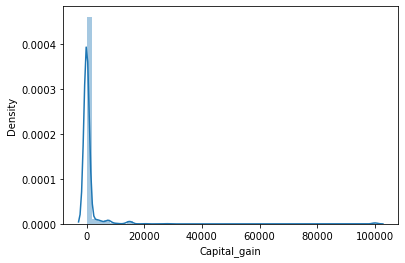

In [181]:
sns.distplot(x['Capital_gain'])
plt.show()

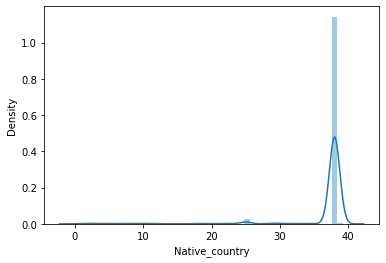

In [182]:
sns.distplot(x['Native_country'])
plt.show()

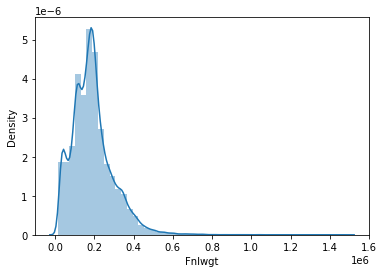

In [183]:
sns.distplot(x['Fnlwgt'])
plt.show()

- little skewness is present

In [184]:
x.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country'],
      dtype='object')

In [185]:
#using power_transform method

from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')
x=pd.DataFrame(x,columns=['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country'])
x.skew()

Age              -0.013897
Workclass         0.216967
Fnlwgt            0.016914
Education_num     0.023885
Marital_status   -0.114201
Occupation       -0.237163
Relationship      0.122917
Race             -2.010817
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
Native_country   -2.981838
dtype: float64

- 'Race' , 'capital_loss' still have some skewness left but we won't further reduce it as it might result in NaN values

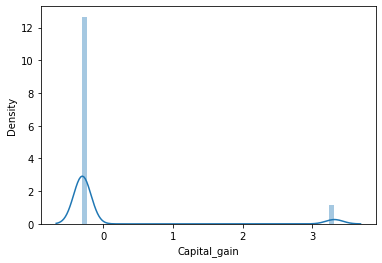

In [186]:
sns.distplot(x['Capital_gain'])
plt.show()

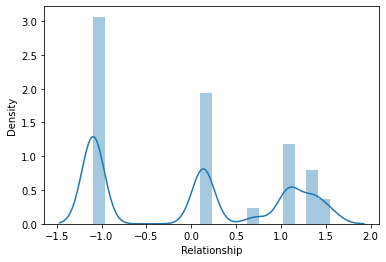

In [187]:
sns.distplot(x['Relationship'])
plt.show()

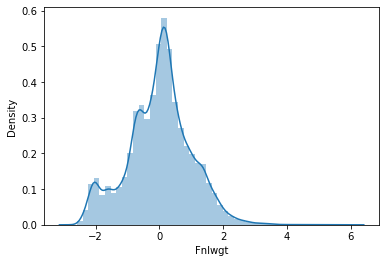

In [188]:
sns.distplot(x['Fnlwgt'])
plt.show()

In [189]:
#checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [190]:
vif_calc()

    VIF Factor        features
0     1.261635             Age
1     1.010145       Workclass
2     1.016604          Fnlwgt
3     1.072289   Education_num
4     1.168943  Marital_status
5     1.013056      Occupation
6     1.932693    Relationship
7     1.049736            Race
8     1.651924             Sex
9     1.041100    Capital_gain
10    1.019587    Capital_loss
11    1.129705  Hours_per_week
12    1.040175  Native_country


- Multicollinearity  isnt present as VIF is very low for feature variables

In [191]:
#scaling the input data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [192]:
#now checking if the dataset is imbalanced or not

y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

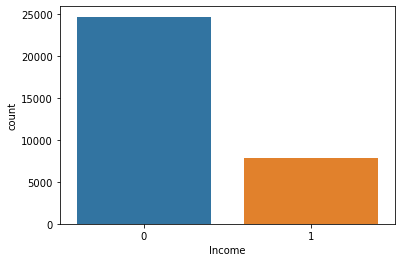

In [193]:
sns.countplot(y)
plt.show()

In [194]:
from imblearn.over_sampling import SMOTE   #over_sampling

train_x,train_y=SMOTE().fit_resample(x,y)

print(train_x.shape)
print(train_y.shape)

(49438, 13)
(49438,)


In [195]:
#since this is binary classification problem first we will use LogisticRegression then we will try out some other algos too

In [196]:
#importing libraries

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [197]:
lr=LogisticRegression()

In [199]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=i,test_size=.30)
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predlr=lr.predict(x_test)
    if round(accuracy_score(y_test,predlr)*100,1)==round(accuracy_score(y_train,predtrain)*100,1):
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',accuracy_score(y_train,predtrain)*100)
        print('Testing accuracy score is',accuracy_score(y_test,predlr)*100,'\n')

At random state 6 the model performs very well
At random state 6 :
Training accuracy score is 77.91134485349362
Testing accuracy score is 77.91936353829557 

At random state 10 the model performs very well
At random state 10 :
Training accuracy score is 77.81020632260301
Testing accuracy score is 77.75080906148867 

At random state 11 the model performs very well
At random state 11 :
Training accuracy score is 77.85933075189273
Testing accuracy score is 77.90587918015103 

At random state 13 the model performs very well
At random state 13 :
Training accuracy score is 77.81598566722533
Testing accuracy score is 77.77777777777779 

At random state 17 the model performs very well
At random state 17 :
Training accuracy score is 77.78130959949142
Testing accuracy score is 77.81823085221143 

At random state 27 the model performs very well
At random state 27 :
Training accuracy score is 77.85355140727042
Testing accuracy score is 77.87216828478964 

At random state 29 the model performs very

In [200]:
#using 71 as the random state for further process

x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=71,test_size=.30)
lr.fit(x_train,y_train)
predtrain=lr.predict(x_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))

0.7790587918015103


In [201]:
print(accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

77.90587918015103
[[5609 1813]
 [1464 5946]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      7422
           1       0.77      0.80      0.78      7410

    accuracy                           0.78     14832
   macro avg       0.78      0.78      0.78     14832
weighted avg       0.78      0.78      0.78     14832



- the recall is good

In [202]:
#importing metrics

from sklearn.metrics import mean_squared_error

#checking error for LogiosticRegression
mselr=mean_squared_error(y_test,predlr)

print(mselr)

0.22094120819848975


In [203]:
#checking cross validation score for logistic regression

for j in range(2,10):
    lrs=cross_val_score(lr,train_x,train_y,cv=j)
    lrc=lrs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lrc*100)
    print('Accuracy score is:',accuracy_score(y_test,predlr)*100,'\n')

At cv= 2
Cross Validation Score is: 77.79238642339901
Accuracy score is: 77.90587918015103 

At cv= 3
Cross Validation Score is: 77.81666896929326
Accuracy score is: 77.90587918015103 

At cv= 4
Cross Validation Score is: 77.78430550984031
Accuracy score is: 77.90587918015103 

At cv= 5
Cross Validation Score is: 77.79644223250236
Accuracy score is: 77.90587918015103 

At cv= 6
Cross Validation Score is: 77.76407844567495
Accuracy score is: 77.90587918015103 

At cv= 7
Cross Validation Score is: 77.76004234850585
Accuracy score is: 77.90587918015103 

At cv= 8
Cross Validation Score is: 77.7802611125165
Accuracy score is: 77.90587918015103 

At cv= 9
Cross Validation Score is: 77.77623105700584
Accuracy score is: 77.90587918015103 



- The model is working well as both cross validation score and accuracy score are coming out to be 77

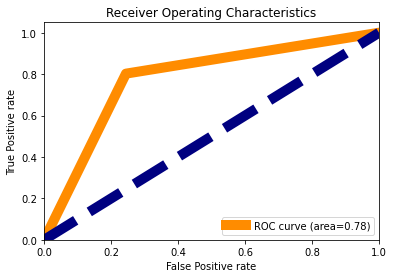

In [204]:
#roc auc plotting for logisticRegression

from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds=roc_curve(y_test,predlr)

roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

In [205]:
#now lets try some more classifcation algorithms 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


#KNeighbors

knn=KNeighborsClassifier()

x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=71,test_size=.30)
knn.fit(x_train,y_train)
predtrain=knn.predict(x_train)
predknn=knn.predict(x_test)

print(accuracy_score(y_test,predknn)*100)

84.79638619201725


In [206]:
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

84.79638619201725
[[5650 1772]
 [ 483 6927]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      7422
           1       0.80      0.93      0.86      7410

    accuracy                           0.85     14832
   macro avg       0.86      0.85      0.85     14832
weighted avg       0.86      0.85      0.85     14832



- the accuracy is great with KNeighbors but recall is poor

In [207]:
#checking erro for KNeighbors

mseknn=mean_squared_error(y_test,predknn)

print(mseknn)

0.1520361380798274


In [209]:
#checking cross validation score for KNeighbors

for j in range(2,6):
    knns=cross_val_score(knn,train_x,train_y,cv=j)
    knnc=knns.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',knnc*100)
    print('Accuracy score is:',accuracy_score(y_test,predknn)*100,'\n')

At cv= 2
Cross Validation Score is: 84.29143573769166
Accuracy score is: 84.79638619201725 

At cv= 3
Cross Validation Score is: 85.12886620335266
Accuracy score is: 84.79638619201725 

At cv= 4
Cross Validation Score is: 85.39993063503897
Accuracy score is: 84.79638619201725 

At cv= 5
Cross Validation Score is: 85.56175192294285
Accuracy score is: 84.79638619201725 



In [210]:
#decisonTree

dtc=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=71,test_size=.30)
dtc.fit(x_train,y_train)
predtrain=dtc.predict(x_train)
preddtc=dtc.predict(x_test)

print(accuracy_score(y_test,preddtc)*100)

84.71548004314995


In [211]:
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

84.71548004314995
[[6281 1141]
 [1126 6284]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7422
           1       0.85      0.85      0.85      7410

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832



- Recall is excellent with DecisionTree
- accuracy is great too

In [212]:
#checking error for DecisionTree

msedtc=mean_squared_error(y_test,preddtc)

print(msedtc)

0.15284519956850054


In [213]:
#checking cross validation score for DecsionTree

for j in range(2,6):
    dtcs=cross_val_score(dtc,train_x,train_y,cv=j)
    dtcc=dtcs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',dtcc*100)
    print('Accuracy score is:',accuracy_score(y_test,preddtc)*100,'\n')

At cv= 2
Cross Validation Score is: 83.81204741292123
Accuracy score is: 84.71548004314995 

At cv= 3
Cross Validation Score is: 84.41900901235289
Accuracy score is: 84.71548004314995 

At cv= 4
Cross Validation Score is: 84.9651518972194
Accuracy score is: 84.71548004314995 

At cv= 5
Cross Validation Score is: 85.23014166063574
Accuracy score is: 84.71548004314995 



# Ensemble:

In [214]:
#now, let's try some ensemble techniques:

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [215]:
#RandomForestClassifier

rf=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=71,test_size=.30)
rf.fit(x_train,y_train)
predtrain=rf.predict(x_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf)*100)

89.62378640776699


In [216]:
print(accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

89.62378640776699
[[6561  861]
 [ 678 6732]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      7422
           1       0.89      0.91      0.90      7410

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832



- Recall and Accuracy both are better with RandomForest than DecisionTree

In [217]:
#checking error for RandomForest

mserf=mean_squared_error(y_test,predrf)

print(mserf)

0.10376213592233009


In [218]:
#checking cross validation score for RandomForest

for j in range(2,6):
    rfs=cross_val_score(rf,train_x,train_y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100)
    print('Accuracy score is:',accuracy_score(y_test,predrf)*100,'\n')

At cv= 2
Cross Validation Score is: 88.46231643674906
Accuracy score is: 89.62378640776699 

At cv= 3
Cross Validation Score is: 89.11376075189153
Accuracy score is: 89.62378640776699 

At cv= 4
Cross Validation Score is: 89.56888099051802
Accuracy score is: 89.62378640776699 

At cv= 5
Cross Validation Score is: 89.77722925203668
Accuracy score is: 89.62378640776699 



- The model is working excellent with RandomForestClassifier

In [219]:
#AdaBoostClassifier

ada=AdaBoostClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=71,test_size=.30)
ada.fit(x_train,y_train)
predtrain=ada.predict(x_train)
predada=ada.predict(x_test)

print(accuracy_score(y_test,predada)*100)

85.57173678532902


In [220]:
print(accuracy_score(y_test,predada)*100)
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

85.57173678532902
[[6131 1291]
 [ 849 6561]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7422
           1       0.84      0.89      0.86      7410

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832



In [221]:
#checking error for AdaBoost

mseada=mean_squared_error(y_test,predada)

print(mseada)

0.1442826321467098


In [222]:
#checking cross validation score for AdaBoost

for j in range(2,5):
    adas=cross_val_score(ada,train_x,train_y,cv=j)
    adac=adas.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',adac*100)
    print('Accuracy score is:',accuracy_score(y_test,predada)*100,'\n')

At cv= 2
Cross Validation Score is: 84.77486953355718
Accuracy score is: 85.57173678532902 

At cv= 3
Cross Validation Score is: 85.07430819081107
Accuracy score is: 85.57173678532902 

At cv= 4
Cross Validation Score is: 85.3049022422767
Accuracy score is: 85.57173678532902 



In [223]:
#GradientBoostingClassifier

gb=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=71,test_size=.30)
gb.fit(x_train,y_train)
predtrain=gb.predict(x_train)
predgb=gb.predict(x_test)

print(accuracy_score(y_test,predgb)*100)

86.58980582524272


In [224]:
print(accuracy_score(y_test,predgb)*100)
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

86.58980582524272
[[6202 1220]
 [ 769 6641]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      7422
           1       0.84      0.90      0.87      7410

    accuracy                           0.87     14832
   macro avg       0.87      0.87      0.87     14832
weighted avg       0.87      0.87      0.87     14832



In [225]:
msegb=mean_squared_error(y_test,predgb)

print(msegb)

0.1341019417475728


In [226]:
#checking cross validation score for GradientBoosting

for j in range(2,5):
    gbs=cross_val_score(gb,train_x,train_y,cv=j)
    gbc=gbs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',gbc*100)
    print('Accuracy score is:',accuracy_score(y_test,predgb)*100,'\n')

At cv= 2
Cross Validation Score is: 85.57991828148388
Accuracy score is: 86.58980582524272 

At cv= 3
Cross Validation Score is: 85.57799303163328
Accuracy score is: 86.58980582524272 

At cv= 4
Cross Validation Score is: 86.1484000692864
Accuracy score is: 86.58980582524272 



In [227]:
from sklearn.metrics import accuracy_score as acs

algodf=pd.DataFrame({'Mean Squared Error':[mselr,mseknn,msedtc,mseada,msegb,mserf],'Accuracy Score':[acs(y_test,predlr),acs(y_test,predknn),acs(y_test,preddtc),acs(y_test,predada),acs(y_test,predgb),acs(y_test,predrf)]},index=['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','AdaBoostClassifer','GradientBoostingClassifier','RandomForestClassifier'])
algodf

,Mean Squared Error,Accuracy Score
LogisticRegression,0.220941,0.779059
KNeighborsClassifier,0.152036,0.847964
DecisionTreeClassifier,0.152845,0.847155
AdaBoostClassifer,0.144283,0.855717
GradientBoostingClassifier,0.134102,0.865898
RandomForestClassifier,0.103762,0.896238


- With RandomForestClassifier the model has Better accuracy score , cross validation score and recall than other algorithms
- The erros are closer to zero with RandomForestClassifier

In [228]:
#doing hyperparametertuning on RandomForest for best results

from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier()
parameters={'criterion':["gini", "entropy"],'max_features':['sqrt','log2','auto']}
clf=GridSearchCV(rf,parameters)
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=33,test_size=.30)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt'}


In [231]:
#finding a good random state

for i in range(10):
    rf=RandomForestClassifier(criterion='entropy',max_features='sqrt')
    x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=i,test_size=.30)
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    
    print('At random state:',i)
    print(accuracy_score(y_test,predrf)*100,'\n')

At random state: 0
89.61030204962243 

At random state: 1
89.86650485436894 

At random state: 2
89.88673139158576 

At random state: 3
90.02831715210357 

At random state: 4
89.51591154261057 

At random state: 5
89.42826321467098 

At random state: 6
89.5361380798274 

At random state: 7
89.54962243797195 

At random state: 8
89.4484897518878 

At random state: 9
89.52265372168284 



In [233]:
#using the random state as 3

rf=RandomForestClassifier(criterion='gini', max_features= 'auto')
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=3,test_size=.30)
rf.fit(x_train,y_train)
predtrain=rf.predict(x_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf)*100)

90.02831715210357


In [229]:
#checking for cross validation score

rf=RandomForestClassifier(criterion='entropy',max_features='sqrt')
for j in range(2,10):
    rfs=cross_val_score(rf,train_x,train_y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100,'\n')

At cv= 2
Cross Validation Score is: 88.46838464339173 

At cv= 3
Cross Validation Score is: 89.13399158505354 

At cv= 4
Cross Validation Score is: 89.60731632098093 

At cv= 5
Cross Validation Score is: 89.78734190691382 

At cv= 6
Cross Validation Score is: 89.89253028751486 

At cv= 7
Cross Validation Score is: 90.00790434337112 

At cv= 8
Cross Validation Score is: 90.03815872584403 

At cv= 9
Cross Validation Score is: 90.09279249548314 



In [236]:
#checking for cross validation score at cv=13

rf=RandomForestClassifier(criterion='entropy', max_features= 'sqrt')
rfs=cross_val_score(rf,train_x,train_y,cv=7)
rfc=rfs.mean()
print('Cross Validation Score is:',rfc*100,'\n')

Cross Validation Score is: 90.02408467304511 



In [237]:
print(classification_report(y_test,predrf))
print(confusion_matrix(y_test,predrf))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7456
           1       0.89      0.91      0.90      7376

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832

[[6630  826]
 [ 653 6723]]


- Recall is excellent

In [238]:
print('Mean Squared Error:',mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))

Mean Squared Error: 0.0997168284789644
Root Mean Squared Error: 0.31577971511635194


- the errors are close to 0, so the model is working well with great accuracy too

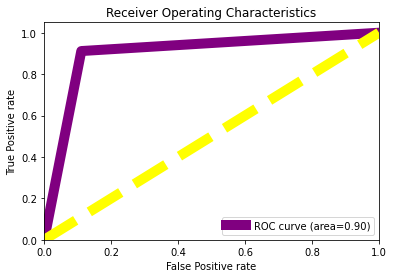

In [239]:
#roc auc plotting


fpr,tpr,thresholds=roc_curve(y_test,predrf)

roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='purple',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='yellow',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

In [243]:
print('The model is performing extremely well with RandomForestClassifier because we are getting both accuracy score and cross validation score as 90.0','\n')
print('Accuracy:',round(accuracy_score(y_test,predrf)*100,1))
print('Cross Validation Score:',round(rfc*100,1))
print('Area Under Curve:',round(auc(fpr,tpr),5))

The model is performing extremely well with RandomForestClassifier because we are getting both accuracy score and cross validation score as 90.0 

Accuracy: 90.0
Cross Validation Score: 90.0
Area Under Curve: 0.90034


In [244]:
preddf=pd.DataFrame({'Income':y_test,'Predicted Income':predrf})
preddf

,Income,Predicted Income
34557,1,1
27864,1,1
8750,1,0
29276,0,0
40325,1,1
...,...,...
39270,1,1
2111,1,1
12335,0,0
9530,0,0


In [246]:
print('People earning more than 50K a year:',(preddf['Income']==1).sum())

People earning more than 50K a year: 7376


In [248]:
print('People earning more than 50K a year(Predicted):',(preddf['Predicted Income']==1).sum())

People earning more than 50K a year(Predicted): 7549


In [249]:
#saving the best model

import pickle

pickle.dump(rf,open('censusincome.pkl','wb'))